In [1]:
import sys
sys.path.append("../")

import os
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from scipy import stats
import engarde.decorators as ed

import statsmodels.formula.api as smf
from linearmodels import PanelOLS
#from library import test

from matplotlib import lines, markers
from cycler import cycler

pd.set_option('mode.chained_assignment', None)

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/linearmodels/panel/data.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import (Categorical, DataFrame, Index, MultiIndex, Panel, Series,


In [2]:
data_path = '/Users/kylieleblancKylie/domino/dofis/data/'
table_path = '/Users/kylieleblancKylie/domino/dofis/results/Who Needs Rules/'
data = pd.read_csv(os.path.join(data_path, 'clean', 'gdid_subject.csv'),
                  sep=",", low_memory= False)
data.sample()

,Unnamed: 0,campus,year,test,score,score_std,campname,campischarter,district,distname,...,middle_math,middle_reading,middle_science,algebra,biology,eng1,math,reading,avescores,treatpost
233498,233498,220905156,2013,m_3rd_avescore,1495.0,0.84313,RIDGLEA HILLS EL,N,220905,FORT WORTH ISD,...,NaN,NaN,NaN,NaN,NaN,NaN,0.52845,0.613229,0.57084,False


# Graph by year of implementation

In [3]:
def create_group_df(df, outcome):
    df['outcome'] = df[outcome]
    new_df = pd.DataFrame(df.groupby(['year']).agg({'outcome': ['mean', 'sem']}))
    new_df = new_df.rename(columns = {'mean': 'outcome_mean', 'sem': 'outcome_se'})
    new_df['ub'] = new_df['outcome']['outcome_mean'] + new_df['outcome']['outcome_se']
    new_df['lb'] = new_df['outcome']['outcome_mean'] - new_df['outcome']['outcome_se']
    return new_df

## Parallel Trends

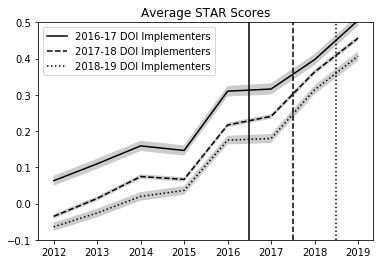

In [4]:
outcome = 'score_std'
# Create cycler object. Use any styling from above you please
df_treat2016 = create_group_df(data[data.doi_year == 2016], outcome = outcome)
df_treat2017 = create_group_df(data[data.doi_year == 2017], outcome = outcome)
df_treat2018 = create_group_df(data[data.doi_year == 2018], outcome = outcome)

monochrome = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '=.']))

fig, ax = plt.subplots(1,1)
ax.set_prop_cycle(monochrome)

ax.plot(list(df_treat2016.index), df_treat2016['outcome']['outcome_mean'], label = '2016-17 DOI Implementers')
ax.plot(list(df_treat2017.index), df_treat2017['outcome']['outcome_mean'],label = '2017-18 DOI Implementers')
ax.plot(list(df_treat2018.index), df_treat2018['outcome']['outcome_mean'], label = '2018-19 DOI Implementers')

ax.legend()


ax.fill_between(list(df_treat2016.index), df_treat2016.lb, df_treat2016.ub, alpha = .2)
ax.fill_between(list(df_treat2017.index), df_treat2017.lb, df_treat2017.ub, alpha = .2)
ax.fill_between(list(df_treat2018.index), df_treat2018.lb, df_treat2018.ub, alpha = .2)

ax.axvline(x = 2016.5, linestyle = '-', color = 'black')
ax.axvline(x = 2017.5, linestyle = '--', color = 'black')
ax.axvline(x = 2018.5, linestyle = ':', color = 'black')

ax.set_title('Average STAR Scores')
ax.grid(False)

ax.set_ylim(-.1, .5)

fig.savefig(table_path + 'trends_by_adoption_' + 'score_std' + '.png', bbox_inches="tight")

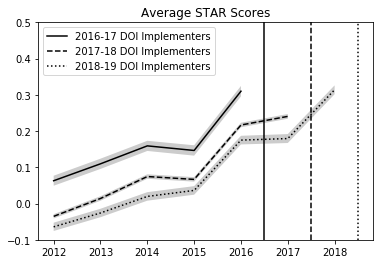

In [5]:
outcome = 'score_std'

df_treat2016 = create_group_df(data[data.doi_year == 2016], outcome = outcome)
df_treat2017 = create_group_df(data[data.doi_year == 2017], outcome = outcome)
df_treat2018 = create_group_df(data[data.doi_year == 2018], outcome = outcome)

monochrome = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '=.']))

fig, ax = plt.subplots(1,1)
ax.set_prop_cycle(monochrome)

ax.plot(list(df_treat2016[df_treat2016.index <= 2016].index), df_treat2016[df_treat2016.index <= 2016]['outcome']['outcome_mean'], label = '2016-17 DOI Implementers')
ax.plot(list(df_treat2017[df_treat2016.index <= 2017].index), df_treat2017[df_treat2016.index <= 2017]['outcome']['outcome_mean'],label = '2017-18 DOI Implementers')
ax.plot(list(df_treat2018[df_treat2016.index <= 2018].index), df_treat2018[df_treat2016.index <= 2018]['outcome']['outcome_mean'], label = '2018-19 DOI Implementers')

ax.legend()


ax.fill_between(list(df_treat2016[df_treat2016.index <= 2016].index), df_treat2016[df_treat2016.index <= 2016].lb, df_treat2016[df_treat2016.index <= 2016].ub, alpha = .2)
ax.fill_between(list(df_treat2017[df_treat2017.index <= 2017].index), df_treat2017[df_treat2016.index <= 2017].lb, df_treat2017[df_treat2016.index <= 2017].ub, alpha = .2)
ax.fill_between(list(df_treat2018[df_treat2018.index <= 2018].index), df_treat2018[df_treat2016.index <= 2018].lb, df_treat2018[df_treat2016.index <= 2018].ub, alpha = .2)

ax.axvline(x = 2016.5, linestyle = '-', color = 'black')
ax.axvline(x = 2017.5, linestyle = '--', color = 'black')
ax.axvline(x = 2018.5, linestyle = ':', color = 'black')

ax.set_title('Average STAR Scores')
ax.grid(False)

ax.set_ylim(-.1, .5)

fig.savefig(table_path + 'pre_trends_by_adoption_' + 'score_std' + '.png', bbox_inches="tight")


### One possible exemption in parallel trends comes between 2014-15 for the 2018-19 implementers. While other groups decrease, this group of districts see an increase in trends.

#### Significant differentail trends?

In [6]:
did_df = data[(data.year == 2014) | (data.year == 2015)]
did_df['treat_placebo'] = np.where(did_df.doi_year == 2018, 1, 0)
did_df['post_placebo'] = np.where(did_df.year > 2014, 1, 0)
did_df['treat_post_placebo'] = did_df.treat_placebo * did_df.post_placebo

did_df = did_df.reset_index()
did_df['year'] = pd.to_datetime(did_df['year'], format='%Y')
#add column year to index
did_df = did_df.set_index(['year', 'campus'])
#swap indexes
did_df.index = did_df.index.swaplevel(0,1)
did_df[['district', 'doi_year','treat_placebo', 'post_placebo', 'treat_post_placebo']].sample(5)

,,district,doi_year,treat_placebo,post_placebo,treat_post_placebo
campus,year,,,,,
161914121,2014-01-01,161914,2017.0,0,0,0
50909001,2014-01-01,50909,2018.0,1,0,0
119901001,2014-01-01,119901,2016.0,0,0,0
43914042,2014-01-01,43914,2017.0,0,0,0
227901151,2014-01-01,227901,2017.0,0,0,0


In [7]:
change_2016 = df_treat2016['outcome']['outcome_mean'].loc[2015] - df_treat2016['outcome']['outcome_mean'].loc[2014]
print(change_2016)
change_2017 = df_treat2017['outcome']['outcome_mean'].loc[2015] - df_treat2017['outcome']['outcome_mean'].loc[2014]
print(change_2017)
change_2018 = df_treat2018['outcome']['outcome_mean'].loc[2015] - df_treat2018['outcome']['outcome_mean'].loc[2014]
print(change_2018)

mod = PanelOLS.from_formula('score_std ~ 1 + treat_placebo + post_placebo + treat_post_placebo', did_df)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print(res)

-0.012674444087076686
-0.007893723317491955
0.016580840895159966
                          PanelOLS Estimation Summary                           
Dep. Variable:              score_std   R-squared:                        0.0005
Estimator:                   PanelOLS   R-squared (Between):              0.0008
No. Observations:               72255   R-squared (Within):               0.0001
Date:                Sun, Dec 22 2019   R-squared (Overall):              0.0005
Time:                        15:02:54   Log-likelihood                -9.908e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      12.286
Entities:                        5813   P-value                           0.0000
Avg Obs:                       12.430   Distribution:                 F(3,72251)
Min Obs:                       1.0000                                           
Max Obs:                       36.000   F-st

# Graph by subject

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/ipykernel/__main__.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/ipykernel/__main__.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/ipykernel/__main__.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


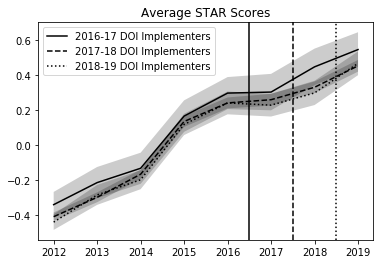

In [10]:
subjects = ['m_3rd_avescore', 'r_3rd_avescore',
            'm_4th_avescore', 'r_4th_avescore', 
            'm_5th_avescore', 'r_5th_avescore', 
            'm_6th_avescore', 'r_6th_avescore',
            'm_7th_avescore', 'r_7th_avescore',
            'm_8th_avescore', 'r_8th_avescore',
            'alg_avescore', 'bio_avescore', 'eng1_avescore']

outcome = 'score_std'
subject = 'bio_avescore'
# Create cycler object. Use any styling from above you please
df_treat2016 = create_group_df(data[data.doi_year == 2016][data.test == subject], outcome = outcome)
df_treat2017 = create_group_df(data[data.doi_year == 2017][data.test == subject], outcome = outcome)
df_treat2018 = create_group_df(data[data.doi_year == 2018][data.test == subject], outcome = outcome)

monochrome = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '=.']))

fig, ax = plt.subplots(1,1)
ax.set_prop_cycle(monochrome)

ax.plot(list(df_treat2016.index), df_treat2016['outcome']['outcome_mean'], label = '2016-17 DOI Implementers')
ax.plot(list(df_treat2017.index), df_treat2017['outcome']['outcome_mean'],label = '2017-18 DOI Implementers')
ax.plot(list(df_treat2018.index), df_treat2018['outcome']['outcome_mean'], label = '2018-19 DOI Implementers')

ax.legend()


ax.fill_between(list(df_treat2016.index), df_treat2016.lb, df_treat2016.ub, alpha = .2)
ax.fill_between(list(df_treat2017.index), df_treat2017.lb, df_treat2017.ub, alpha = .2)
ax.fill_between(list(df_treat2018.index), df_treat2018.lb, df_treat2018.ub, alpha = .2)

ax.axvline(x = 2016.5, linestyle = '-', color = 'black')
ax.axvline(x = 2017.5, linestyle = '--', color = 'black')
ax.axvline(x = 2018.5, linestyle = ':', color = 'black')

ax.set_title('Average STAR Scores')
ax.grid(False)


fig.savefig(table_path + 'trends_by_adoption_' + 'score_std' + '.png', bbox_inches="tight")

# Demographic Trends

In [11]:
df_control = pd.DataFrame(data[data.doi == False].groupby(['year'])['students_hisp'].mean()).reset_index()
df_treat2016 = pd.DataFrame(data[data.doi_year == 2016].groupby(['year'])['students_hisp'].mean()).reset_index()
df_treat2017 = pd.DataFrame(data[data.doi_year == 2017].groupby(['year'])['students_hisp'].mean()).reset_index()
df_treat2018 = pd.DataFrame(data[data.doi_year == 2018].groupby(['year'])['students_hisp'].mean()).reset_index()
df_treat2018

,year,students_hisp
0,2012,0.444129
1,2013,0.449500
2,2014,0.454304
3,2015,0.463432
4,2016,0.470314
5,2017,0.473439
6,2018,0.477036
7,2019,0.477508


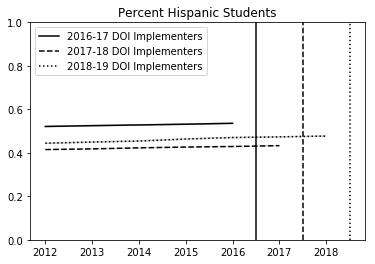

In [14]:
outcome = 'students_hisp'

df_treat2016 = create_group_df(data[data.doi_year == 2016], outcome = outcome)
df_treat2017 = create_group_df(data[data.doi_year == 2017], outcome = outcome)
df_treat2018 = create_group_df(data[data.doi_year == 2018], outcome = outcome)

monochrome = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '=.']))

fig, ax = plt.subplots(1,1)
ax.set_prop_cycle(monochrome)

ax.plot(list(df_treat2016[df_treat2016.index <= 2016].index), df_treat2016[df_treat2016.index <= 2016]['outcome']['outcome_mean'], label = '2016-17 DOI Implementers')
ax.plot(list(df_treat2017[df_treat2016.index <= 2017].index), df_treat2017[df_treat2016.index <= 2017]['outcome']['outcome_mean'],label = '2017-18 DOI Implementers')
ax.plot(list(df_treat2018[df_treat2016.index <= 2018].index), df_treat2018[df_treat2016.index <= 2018]['outcome']['outcome_mean'], label = '2018-19 DOI Implementers')

ax.legend()


ax.fill_between(list(df_treat2016[df_treat2016.index <= 2016].index), df_treat2016[df_treat2016.index <= 2016].lb, df_treat2016[df_treat2016.index <= 2016].ub, alpha = .2)
ax.fill_between(list(df_treat2017[df_treat2017.index <= 2017].index), df_treat2017[df_treat2016.index <= 2017].lb, df_treat2017[df_treat2016.index <= 2017].ub, alpha = .2)
ax.fill_between(list(df_treat2018[df_treat2018.index <= 2018].index), df_treat2018[df_treat2016.index <= 2018].lb, df_treat2018[df_treat2016.index <= 2018].ub, alpha = .2)

ax.axvline(x = 2016.5, linestyle = '-', color = 'black')
ax.axvline(x = 2017.5, linestyle = '--', color = 'black')
ax.axvline(x = 2018.5, linestyle = ':', color = 'black')

ax.set_title('Percent Hispanic Students')
ax.grid(False)

ax.set_ylim(0, 1)

fig.savefig(table_path + 'hispanic_by_adoption_' + 'score_std' + '.png', bbox_inches="tight")

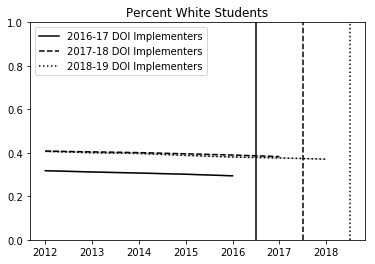

In [17]:
outcome = 'students_white'

df_treat2016 = create_group_df(data[data.doi_year == 2016], outcome = outcome)
df_treat2017 = create_group_df(data[data.doi_year == 2017], outcome = outcome)
df_treat2018 = create_group_df(data[data.doi_year == 2018], outcome = outcome)

monochrome = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '=.']))

fig, ax = plt.subplots(1,1)
ax.set_prop_cycle(monochrome)

ax.plot(list(df_treat2016[df_treat2016.index <= 2016].index), df_treat2016[df_treat2016.index <= 2016]['outcome']['outcome_mean'], label = '2016-17 DOI Implementers')
ax.plot(list(df_treat2017[df_treat2016.index <= 2017].index), df_treat2017[df_treat2016.index <= 2017]['outcome']['outcome_mean'],label = '2017-18 DOI Implementers')
ax.plot(list(df_treat2018[df_treat2016.index <= 2018].index), df_treat2018[df_treat2016.index <= 2018]['outcome']['outcome_mean'], label = '2018-19 DOI Implementers')

ax.legend()


ax.fill_between(list(df_treat2016[df_treat2016.index <= 2016].index), df_treat2016[df_treat2016.index <= 2016].lb, df_treat2016[df_treat2016.index <= 2016].ub, alpha = .2)
ax.fill_between(list(df_treat2017[df_treat2017.index <= 2017].index), df_treat2017[df_treat2016.index <= 2017].lb, df_treat2017[df_treat2016.index <= 2017].ub, alpha = .2)
ax.fill_between(list(df_treat2018[df_treat2018.index <= 2018].index), df_treat2018[df_treat2016.index <= 2018].lb, df_treat2018[df_treat2016.index <= 2018].ub, alpha = .2)

ax.axvline(x = 2016.5, linestyle = '-', color = 'black')
ax.axvline(x = 2017.5, linestyle = '--', color = 'black')
ax.axvline(x = 2018.5, linestyle = ':', color = 'black')

ax.set_title('Percent White Students')
ax.grid(False)

ax.set_ylim(0, 1)

fig.savefig(table_path + 'white_by_adoption_' + 'score_std' + '.png', bbox_inches="tight")

## Number of Students

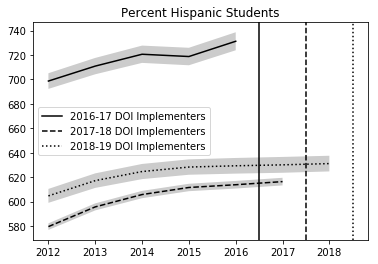

In [16]:
outcome = 'students_num'

df_treat2016 = create_group_df(data[data.doi_year == 2016], outcome = outcome)
df_treat2017 = create_group_df(data[data.doi_year == 2017], outcome = outcome)
df_treat2018 = create_group_df(data[data.doi_year == 2018], outcome = outcome)

monochrome = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '=.']))

fig, ax = plt.subplots(1,1)
ax.set_prop_cycle(monochrome)

ax.plot(list(df_treat2016[df_treat2016.index <= 2016].index), df_treat2016[df_treat2016.index <= 2016]['outcome']['outcome_mean'], label = '2016-17 DOI Implementers')
ax.plot(list(df_treat2017[df_treat2016.index <= 2017].index), df_treat2017[df_treat2016.index <= 2017]['outcome']['outcome_mean'],label = '2017-18 DOI Implementers')
ax.plot(list(df_treat2018[df_treat2016.index <= 2018].index), df_treat2018[df_treat2016.index <= 2018]['outcome']['outcome_mean'], label = '2018-19 DOI Implementers')

ax.legend()


ax.fill_between(list(df_treat2016[df_treat2016.index <= 2016].index), df_treat2016[df_treat2016.index <= 2016].lb, df_treat2016[df_treat2016.index <= 2016].ub, alpha = .2)
ax.fill_between(list(df_treat2017[df_treat2017.index <= 2017].index), df_treat2017[df_treat2016.index <= 2017].lb, df_treat2017[df_treat2016.index <= 2017].ub, alpha = .2)
ax.fill_between(list(df_treat2018[df_treat2018.index <= 2018].index), df_treat2018[df_treat2016.index <= 2018].lb, df_treat2018[df_treat2016.index <= 2018].ub, alpha = .2)

ax.axvline(x = 2016.5, linestyle = '-', color = 'black')
ax.axvline(x = 2017.5, linestyle = '--', color = 'black')
ax.axvline(x = 2018.5, linestyle = ':', color = 'black')

ax.set_title('Percent Hispanic Students')
ax.grid(False)

fig.savefig(table_path + 'size_by_adoption_' + 'score_std' + '.png', bbox_inches="tight")

# Inputs

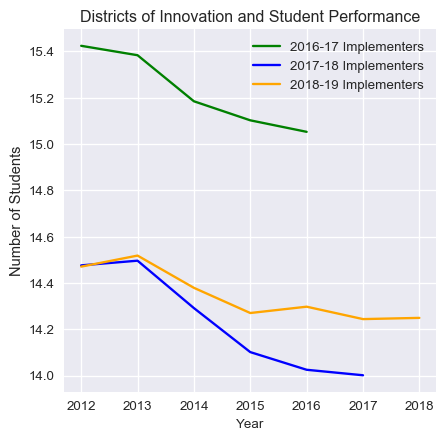

In [117]:
df_treat2016 = pd.DataFrame(data[data.doi_year == 2016].groupby(['year'])['stu_teach_ratio'].mean()).reset_index()
df_treat2017 = pd.DataFrame(data[data.doi_year == 2017].groupby(['year'])['stu_teach_ratio'].mean()).reset_index()
df_treat2018 = pd.DataFrame(data[data.doi_year == 2018].groupby(['year'])['stu_teach_ratio'].mean()).reset_index()

plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df_treat2016[df_treat2016.year <= 2016].year, df_treat2016[df_treat2016.year <= 2016].stu_teach_ratio, color = 'green', label = '2016-17 Implementers')
plt.plot(df_treat2017[df_treat2017.year <= 2017].year, df_treat2017[df_treat2017.year <= 2017].stu_teach_ratio, color = 'blue', label = '2017-18 Implementers')
plt.plot(df_treat2018[df_treat2018.year <= 2018].year, df_treat2018[df_treat2018.year <= 2018].stu_teach_ratio, color = 'orange', label = '2018-19 Implementers')

plt.legend()



plt.ylabel('Number of Students')
plt.title('Districts of Innovation and Student Performance')
plt.xlabel('Year', size = 'medium')

#plt.savefig(table_path + 'CITS.png', bbox_inches="tight")

plt.show()

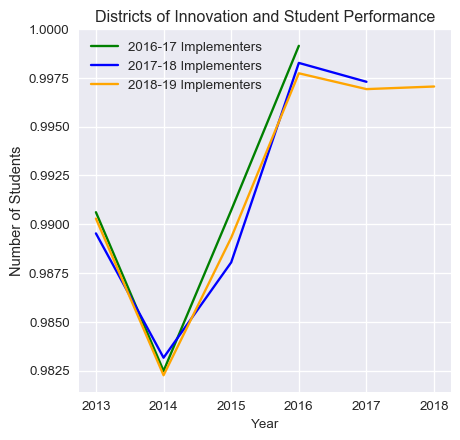

In [118]:
df_treat2016 = pd.DataFrame(data[data.doi_year == 2016].groupby(['year'])['certification'].mean()).reset_index()
df_treat2017 = pd.DataFrame(data[data.doi_year == 2017].groupby(['year'])['certification'].mean()).reset_index()
df_treat2018 = pd.DataFrame(data[data.doi_year == 2018].groupby(['year'])['certification'].mean()).reset_index()

plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df_treat2016[df_treat2016.year <= 2016].year, df_treat2016[df_treat2016.year <= 2016].certification, color = 'green', label = '2016-17 Implementers')
plt.plot(df_treat2017[df_treat2017.year <= 2017].year, df_treat2017[df_treat2017.year <= 2017].certification, color = 'blue', label = '2017-18 Implementers')
plt.plot(df_treat2018[df_treat2018.year <= 2018].year, df_treat2018[df_treat2018.year <= 2018].certification, color = 'orange', label = '2018-19 Implementers')

plt.legend()



plt.ylabel('Number of Students')
plt.title('Districts of Innovation and Student Performance')
plt.xlabel('Year', size = 'medium')

#plt.savefig(table_path + 'CITS.png', bbox_inches="tight")

plt.show()